In [203]:
x, y = load_diabetes(return_X_y=True)

In [204]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [205]:
class gdn:
    def __init__(self, epoc, lr):
        self.epoc = epoc
        self.lr = lr

    def fit(self, x_train, y_train):
        self.intercept_ = 0  # beta 0
        self.coef_ = np.ones(x_train.shape[1])
        for i in range(self.epoc):
            y_hat = np.dot(x_train, self.coef_) + self.intercept_
            slop_intercept = -2 * np.mean(y_train - y_hat)
            self.intercept_ = self.intercept_ - (self.lr * slop_intercept)

            slop_coef = -2 * np.dot((y_train - y_hat), x_train) / x_train.shape[0]
            self.coef_ = self.coef_ - (self.lr * slop_coef)

    def predict(self, x_test):
        return np.dot(x_test, self.coef_) + self.intercept_

In [227]:
obj = gdn(5000, 0.0999)

In [228]:
x_train.shape
y_train.shape

(353,)

In [229]:
obj.fit(x_train, y_train)

In [230]:
pre = obj.predict(x_test)

In [231]:
r2_score(y_test, pre)

0.4534586716143849

In [225]:
lr = 0
r2 = []
lr1 =[]
for i in range(100):
    lr = lr + 0.01
    obj = gdn(100, lr)
    obj.fit(x_train, y_train)
    pre = obj.predict(x_test)
    lr1.append(lr)
    r2.append(r2_score(y_test, pre))

<IPython.core.display.Javascript object>

<AxesSubplot:>

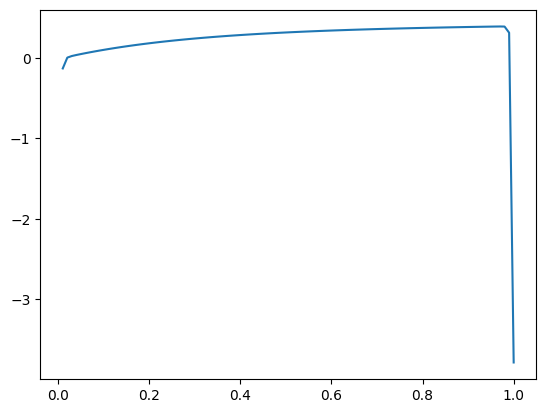

In [226]:
sns.lineplot(x= lr1,y=r2)